<a href="https://colab.research.google.com/github/keizikang/self_study_mldl/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_3%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3장: 회귀 알고리즘과 모델 규제: 농어의 무게를 예측하라!

## 3-1 k-최근접 이웃 회귀

지난번까지 했던 건 길이와 무게로부터 분류Classify 하는 것

즉, 주어진 특성값feature으로부터 class를 찾아가는 것

이번에 할 것은 특성값으로 다른 특성값을 유추하는 것 -> 회귀

---
  * **분류: 비슷한 것들끼리는 비슷한 특성값을 가질 것이다.**
    * 예: 도미끼리는 특성값(길이, 무게)이 비슷할 것이다.
    * 분류이므로 결과값은 이산값임
  * **회귀: 비슷한 것들끼리는 특성값의 관계도 비슷할 것이다.**
    * 예: 길이가 비슷한 농어들은 무게도 비슷할 것이다.
    * 회귀이므로 결과값은 연속값임

---
훈련 데이터로 농어perch의 길이와 무게 56개가 있음

새로운 길이가 들어왔을 때 무게를 추정하고자 함

우선 데이터 확인


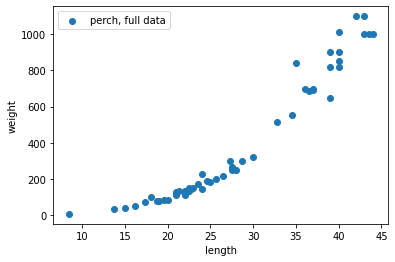

In [1]:
import numpy as np

# perch data from bit.ly/perch_data
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight, label='perch, full data')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

전체 데이터를 훈련 세트와 테스트 세트로 나누고

np.reshape으로 크기를 맞춰줌

다시 그래프로 확인해보겠음

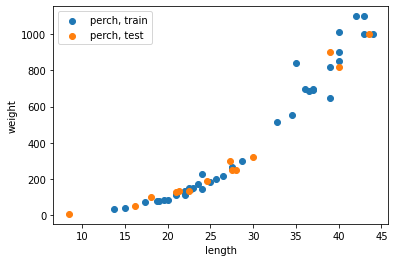

In [2]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

# 사이킷런에 입력하는 훈련 세트는 행 방향으로 각 샘플이 들어감
# 즉, 훈련 세트의 행 개수가 샘플 개수와 같아야 함
# numpy의 reshape을 이용해서 해결

train_input = train_input.reshape(-1, 1) # (42, 1)이 됨
test_input = test_input.reshape(-1, 1) # (14, 1)이 됨

plt.scatter(train_input, train_target, label='perch, train')
plt.scatter(test_input, test_target, label='perch, test')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

참고 (중요): [KNeighborsRegressor.fit(X, y)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.fit)
 
fit(X, y)

Parameters

X: Training data of shape (n_samples, n_features)

y: Target values of shape (n_samples,)

Training data는 첫 번째 차원이 샘플 차원임 said [저자](https://groups.google.com/g/ml-dl-book-qna/c/bOgyl1D8pyY)


k-최근접 이웃 회귀 알고리즘은 KNeighborsRegressor 클래스를 이용함

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

knr.score(test_input, test_target)

0.992809406101064

knr.score가 반환하는 값은 결정계수coefficient of determination

R<sup>2</sup>라고도 부르며 계산식은 아래와 같음

$ R^2 = 1 - {{\Sigma(타겟-예측)^2} \over {\Sigma(타겟-타겟평균)^2}} $

타겟과 예측이 일치하면 R<sup>2</sup>=1이 됨

예측이 아주 많이 이상하면 R<sup>2</sup>는 음수가 될 수 있음

아래 코드는 R<sup>2</sup>를 직접 계산해본 것

knr.score()의 결과와 동일함을 알 수 있음

In [4]:
prediction = knr.predict(test_input)

num = np.linalg.norm(test_target - prediction)**2
den = np.linalg.norm(test_target - np.mean(test_target))**2

R2 = 1 - num/den

R2

0.992809406101064

knr.score()에 train_input과 train_target을 넣으면 R<sup>2</sup>가 1이 나올까?

안 나옴. knr.n_neighbors가 5이기 때문

In [9]:
knr.n_neighbors = 5
# print(knr.n_neighbors)
knr.score(train_input, train_target)

0.9698823289099254

knr.n_neighbors를 1로 바꾸면 자기 자신만 이용해서 예측한 거니까

R<sup>2</sup>가 1이 나와야 할까?

이것도 1이 안나옴

예를 들어 지금 train_input에는 길이 22짜리 농어가 5마리 있음

(무게 135, 120, 130, 110, 120)

이제 새 입력으로 22가 들어가면

같은 입력에 타겟이 5개 있으므로 이 중 뭘 쓸지 알 수 없음

확실하진 않지만 가장 앞의 값을 쓰는것 같음 (135)

참고로 n_neighbors를 5로 했을 때 22에 대한 predict() 결과는

135, 120, 130, 110, 120의 평균인 123임

In [55]:
knr.n_neighbors = 5
# print(knr.n_neighbors)
print(knr.score(train_input, train_target))

# train_input 중 길이 22인 것들만 골라냄
idx = np.where(train_input == 22)[0]
print(np.hstack((train_input[idx, :], train_target[idx].reshape(-1, 1))))
knr.predict([[22]])


0.9698823289099254
[[ 22. 135.]
 [ 22. 120.]
 [ 22. 130.]
 [ 22. 110.]
 [ 22. 120.]]


array([123.])

knr.predict()를 이용하면 실제로 모델이 어떤 값으로 예측하는지 알 수 있음

아래는 prediction과 target을 비교한 것

In [35]:
comparison = np.hstack((prediction, test_target.reshape(-1, 1)))
print(comparison)



[[  60.     5.9]
 [  79.6  100. ]
 [ 248.   250. ]
 [ 122.   130. ]
 [ 136.   130. ]
 [ 847.   820. ]
 [ 311.4  320. ]
 [ 183.4  188. ]
 [ 847.   900. ]
 [ 113.   125. ]
 [1010.  1000. ]
 [  60.    51.5]
 [ 248.   250. ]
 [ 248.   300. ]]


첫 번째 놈이 유독 오차가 크다. 이유가 있다. 

그래프를 보면 맨 왼쪽 주황색 점이 길이 8.4짜리인데,

가까운 5개 점이 전부 너무 멀리 있다. 

실제로 가까운 5개의 무게를 찾아 평균을 계산해보면 딱 60이 나온다.

In [37]:
nearest_to_smallest_test = sorted(train_target)[0:5]
print(nearest_to_smallest_test)
print(np.mean(nearest_to_smallest_test))

[32.0, 40.0, 70.0, 78.0, 80.0]
60.0


과대적합overfitting: 훈련 세트 점수 >> 테스트 세트 점수인 경우

과소적합underfitting: 훈련 세트 점수 << 테스트 세트 점수, 또는 둘다 낮은 경우

지금 훈련 세트 점수가 0.9698823289099254이고

테스트 세트 점수가 0.992809406101064이므로

과소적합임

과소적합을 해결하는 간단한 방법: n_neighbors를 줄이면 됨

3으로 해보자

In [48]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)

print('training set score: ', end='')
print(knr.score(train_input, train_target))
print('test set score    : ', end='')
print(knr.score(test_input, test_target))
          

training set score:0.9804899950518966
test set score    :0.9746459963987609


로컬한 값의 변화를

노이즈로 볼거냐 데이터의 특성을 볼거냐의 차이

데이터의 특성을 본다면 n_neighbors를 줄이면 되고

그렇게 하면 

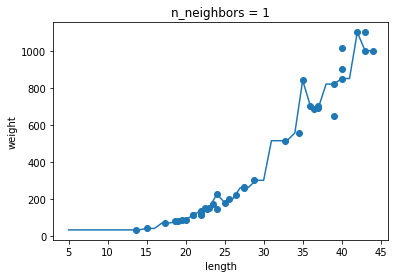

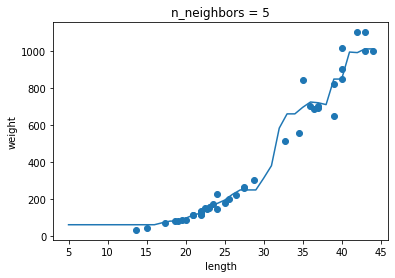

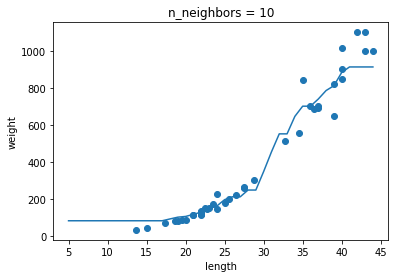

In [50]:
# Problem 03-1-2

knr = KNeighborsRegressor()

x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)

    prediction = knr.predict(x)
    
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title(f'n_neighbors = {n}')
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()